In [1]:
import numpy as np
from PIL import Image
from numpy import histogram as hist  # call hist, otherwise np.histogram
import matplotlib.pyplot as plt
import math
from scipy.signal import convolve2d as conv2
import heapq


In [2]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [3]:
#  compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
#  assume that image intensity varies between 0 and 255
#
#  img_gray - input image in grayscale format
#  num_bins - number of bins in the histogram
def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'
    bins=np.arange(0,255+1,step=255/num_bins)
    counts=np.zeros(num_bins,dtype='int')

    for pixel in img_gray.reshape(128*128):
        for number,bin_ in enumerate(bins):
            if pixel>=bin_ and pixel < bins[number+1]:
            #print(pixel,number+1)
                counts[number]+=1
    
    hists= np.round(np.divide(counts,sum(counts)),2)
    


    

    return hists, bins


In [4]:
path='D:\sapienza\Advanced Machine Learning\Identification\model'

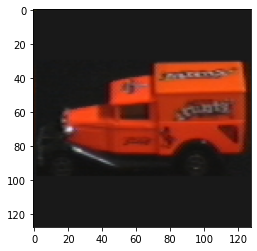

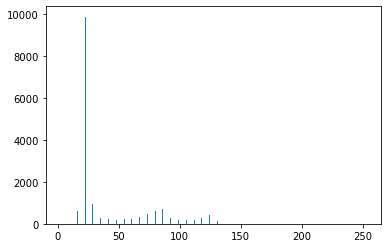

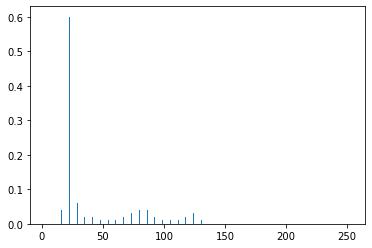

In [5]:
## gray-value histograms (Question 2.a)

img_color = np.array(Image.open(path+ '/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(1)
#plt.subplot(1,3,1)
plt.imshow(img_color)
plt.show()

#plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)
plt.show()

#plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)
plt.show()

In [6]:
#  Compute the *joint* histogram for each color channel in the image
#  The histogram should be normalized so that sum of all values equals 1
#  Assume that values in each channel vary between 0 and 255
#
#  img_color - input color image
#  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^3
#
#  E.g. hists[0,9,5] contains the number of image_color pixels such that:
#       - their R values fall in bin 0
#       - their G values fall in bin 9
#       - their B values fall in bin 5
def rgb_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'


    bins=np.arange(0,255+1,step=255/num_bins)
    
    img_color_double=img_color_double.reshape(128*128,3)



    #Define a 3D histogram  with "num_bins^3" number of entries
    hists = np.zeros((num_bins, num_bins, num_bins))
    
    # Loop for each pixel i in the image 
    for i in range(img_color_double.shape[0]):
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i
        counts=np.zeros(img_color_double.shape[1],dtype='int')
        for j in range(img_color_double.shape[1]):
            for number,bin_ in enumerate(bins):
                if img_color_double[i][j]>=bin_ and img_color_double[i][j]<bins[number+1]:
                    counts[j]=number
        hists[counts[0],counts[1],counts[2]]+=1
        
        
        


    #Normalize the histogram such that its integral (sum) is equal 1
    hists= np.divide(hists,np.sum(hists))

    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    assert sum(hists)==1

    return hists


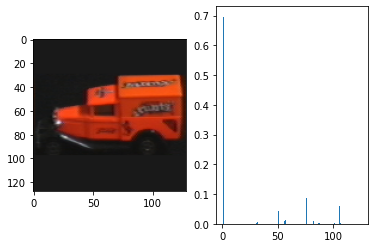

In [7]:
#Compose and test RGB histograms (histogram_module.rgb_hist)
plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rgb = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb.size+1)),hist_rgb)
plt.show()

In [8]:
#  Compute the *joint* histogram for the R and G color channels in the image
#  The histogram should be normalized so that sum of all values equals 1
#  Assume that values in each channel vary between 0 and 255
#
#  img_color - input color image
#  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2
#
#  E.g. hists[0,9] contains the number of image_color pixels such that:
#       - their R values fall in bin 0
#       - their G values fall in bin 9
def rg_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'


    bins=np.arange(0,255+1,step=255/num_bins)
    
    img_color_double=img_color_double.reshape(128*128,3)



    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))
    
    
        
    # Loop for each pixel i in the image 
    for i in range(img_color_double.shape[0]):
        # Increment the histogram bin which corresponds to the R,G value of the pixel i
        counts=np.zeros(img_color_double.shape[1]-1,dtype='int')
        for j in range(img_color_double.shape[1]-1):
            for number,bin_ in enumerate(bins):
                if img_color_double[i][j]>=bin_ and img_color_double[i][j]<bins[number+1]:
                    counts[j]=number
        hists[counts[0],counts[1]]+=1

    hists= np.divide(hists,np.sum(hists))

    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    
    assert sum(hists)==1

    return hists


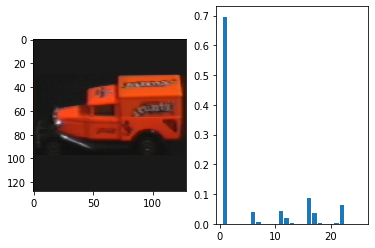

In [9]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(img_color)
#plt.show()

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

In [10]:
def gauss(sigma):
    x = np.linspace(-3*sigma**2, 3*sigma**2, 97)
    var = (x**2) / (2*sigma**2)
    Gx = (1 / (np.sqrt(2*math.pi) * sigma)) * np.exp(-var) # Gaussian formula for 1 variable
    #Gx /= np.trapz(Gx) # normalize the integral to 1
    return Gx, x

def gaussdx(sigma):
    x = np.linspace(-3*sigma**2, 3*sigma**2, 97)
    var = (x**2) / (2*sigma**2)
    var1 = (1 / (np.sqrt(2*math.pi) * sigma**3))
    Dx = -var1 * x * np.exp(-var) # 1st derivative
    return Dx, x


def gaussderiv(img, sigma):
    Gx = gauss(sigma)[0] # Gaussian 1D filter
    Dx = gaussdx(sigma)[0] # Gaussian x-derivative 1D filter
    Gx = Gx.reshape(1, Gx.size)
    Dx = Dx.reshape(1, Gx.size)
    Dy = Dx.T # Gaussian y-derivative 1D filter

    # image smoothed with std sigma and derived in x and y directions
    imgDx = conv2(conv2(img, Gx, 'same'), Dx, 'same')
    imgDy = conv2(conv2(img, Gx, 'same'), Dy, 'same')
    return imgDx, imgDy

In [11]:
#  Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
#  Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
#  The histogram should be normalized so that sum of all values equals 1
#
#  img_gray - input gray value image
#  num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2
#
#  Note: you may use the function gaussderiv from the Filtering exercise (gauss_module.py)
def dxdy_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    
    
    
    


    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))


    [imgDx,imgDy]=gaussderiv(img_gray,sigma=3)
    
    minimo=min(np.min(imgDx),np.min(imgDy))
    
    maximo=max(np.max(imgDx),np.max(imgDy))
    
    bins=np.linspace(minimo,maximo+1,num_bins)
    
    

    
    
    imgDx=imgDx[(imgDx<=-6) | (imgDx>=6) ]
    
    imgDy=imgDy[(imgDy<=-6) | (imgDy>=6) ]
    
    
    #print(imgDx.shape,imgDy.shape)
    
    
    
    
        

    
    imgDx=imgDx.reshape(imgDx.size)
    imgDy=imgDy.reshape(imgDy.size)
    
    
    
    #print(min(len(imgDx),len(imgDy)))

    
    for i in range(min(len(imgDx),len(imgDy))): # after caping the derivatives within[-6,6], our arrays have different sizes.
        # for this reason, we will loop in the range of the length of the smaller array
        counts=np.zeros(len(img_gray.shape),dtype='int')
        for number,bin_ in enumerate(bins):
            if imgDx[i]>=bin_ and imgDx[i] < bins[number+1]:
                counts[0]=number
            if imgDy[i]>=bin_ and imgDy[i] < bins[number+1]:   
                counts[1]=number
                
        hists[counts[0],counts[1]]+=1
        
        
    hists= np.divide(hists,np.sum(hists))



        
        
    
    


    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    
    assert np.sum(hists)==1
    return hists

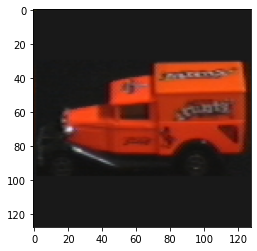

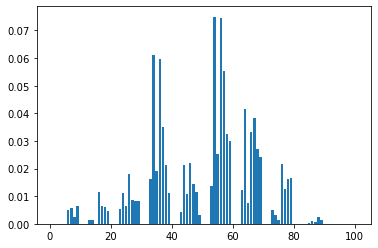

In [12]:
#Compose and test dxdy histograms (histogram_module.dxdy_hist)
plt.figure(5)
#plt.subplot(1,2,1)
plt.imshow(img_color)
plt.show()

num_bins_dxdy = 10
#plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

In [13]:
# Compute the intersection distance between histograms x and y
# Return 1 - hist_intersection, so smaller values correspond to more similar histograms
# Check that the distance range in [0,1]

def dist_intersect(x,y):
    assert len(x)==len(y)
    sum_q_v=0
    sum_q=0
    sum_v=0
    for i in range(len(y)):
        sum_q_v+=min(x[i],y[i])
        sum_q+=x[i]
        sum_v+=y[i]
    
    sim=(sum_q_v/sum_q+sum_q_v/sum_v)/2
    assert 0<=sim<=1
    return 1-sim


    
    


In [14]:

# Compute the L2 distance between x and y histograms
# Check that the distance range in [0,sqrt(2)]

def dist_l2(x,y):
    assert len(x)==len(y)
    sums=0
    for i in range(len(x)):
        sums+=np.square(x[i]-y[i])
        
    assert 0<=sums<=math.sqrt(2)
    return sums
        
    


In [15]:
# Compute chi2 distance between x and y
# Check that the distance range in [0,Inf]
# Add a minimum score to each cell of the histograms (e.g. 1) to avoid division by 0

def dist_chi2(x,y):
    
    assert len(x)==len(y)
    sums=0
    for i in range(len(x)):
        x[i]+=1
        y[i]+=1
        sums+=np.square(x[i]-y[i])/(x[i]+y[i])
    
    assert 0<=sums<=math.inf
    return sums
    


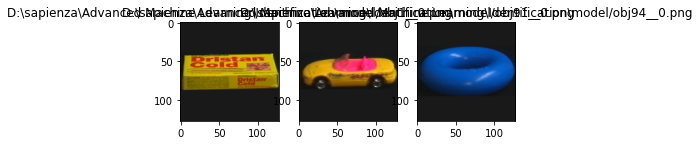

In [16]:
## Distance functions (Question 2.c)

image_files1 = [path+'/obj1__0.png']
image_files2 = [path+'/obj91__0.png', path+'/obj94__0.png']

plt.figure()
plt.subplot(1,3,1); plt.imshow(np.array(Image.open(image_files1[0])), vmin=0, vmax=255); plt.title(image_files1[0])
plt.subplot(1,3,2); plt.imshow(np.array(Image.open(image_files2[0])), vmin=0, vmax=255); plt.title(image_files2[0])
plt.subplot(1,3,3); plt.imshow(np.array(Image.open(image_files2[1])), vmin=0, vmax=255); plt.title(image_files2[1])
plt.show()

img1_color = np.array(Image.open(image_files1[0]))
img2_color = np.array(Image.open(image_files2[0]))
num_bins_color = 30
hist1_rgb = rgb_hist(img1_color.astype('double'), num_bins_color)
hist2_rgb = rgb_hist(img2_color.astype('double'), num_bins_color)


In [17]:
print('Distance according to dist_l2 %f'% dist_l2(hist1_rgb,hist2_rgb))
print('Distance according to dist_intersect %f'% dist_intersect(hist1_rgb,hist2_rgb))
print('Distance according to dist_chi2 %f'% dist_chi2(hist1_rgb,hist2_rgb))

Distance according to dist_l2 0.003344
Distance according to dist_intersect 0.293152
Distance according to dist_chi2 0.001302


In [18]:
def is_grayvalue_hist(hist_name):
    if hist_name == 'grayvalue' or hist_name == 'dxdy':
        return True
    elif hist_name == 'rgb' or hist_name == 'rg':
        return False
    else:
        assert False, 'unknown histogram type'

In [19]:
def get_hist_by_name(img, num_bins_gray, hist_name):
    if hist_name == 'grayvalue':
        return normalized_hist(img, num_bins_gray)
    elif hist_name == 'rgb':
        return rgb_hist(img, num_bins_gray)
    elif hist_name == 'rg':
        return rg_hist(img, num_bins_gray)
    elif hist_name == 'dxdy':
        return dxdy_hist(img, num_bins_gray)
    else:
        assert False, 'unknown distance: %s'%hist_name

In [20]:
def get_dist_by_name(x, y, dist_name):
    if dist_name == 'chi2':
        return dist_chi2(x,y)
    elif dist_name == 'intersect':
        return dist_intersect(x,y)
    elif dist_name == 'l2':
        return dist_l2(x,y)
    else:
        assert False, 'unknown distance: %s'%dist_name

In [21]:
## Distance functions (Question 2.c)


distance_types = ['l2', 'intersect', 'chi2']
print('distance functions:', distance_types)

hist_types = ['grayvalue', 'rgb', 'rg', 'dxdy']
print('histogram types:', hist_types)

num_bins_color = 30;
num_bins_gray = 90;

for img1_file in image_files1:
    img1_color = np.array(Image.open(img1_file))
    img1_color = img1_color.astype('double')
    img1_gray = rgb2gray(img1_color)
    
    for img2_file in image_files2:
        img2_color = np.array(Image.open(img2_file))
        img2_color = img2_color.astype('double')
        img2_gray = rgb2gray(img2_color)
    
        D = np.zeros( (len(distance_types),len(hist_types)) )
    
        for didx in range(len(distance_types)):
    
            for hidx in range(len(hist_types)):
    
                if is_grayvalue_hist(hist_types[hidx]):
                    hist1 = get_hist_by_name(img1_gray, num_bins_gray, hist_types[hidx])
                    hist2 = get_hist_by_name(img2_gray, num_bins_gray, hist_types[hidx])
            
                else:
                    hist1 = get_hist_by_name(img1_color, num_bins_color, hist_types[hidx])
                    hist2 = get_hist_by_name(img2_color, num_bins_color, hist_types[hidx])
    
                if len(hist1) == 2:
                    hist1 = hist1[0]
                if len(hist2) == 2:
                    hist2 = hist2[0]
    
                D[didx, hidx] = get_dist_by_name(hist1, hist2, distance_types[didx])
         
        print('Comparison of images "%s" to "%s":'% (img1_file, img2_file))
        print(D)
        print('\n')


print('Legend:')
print('%s-%s, %s-%s, %s-%s, %s-%s'%('l2', 'grayvalue', 'l2', 'rgb', 'l2', 'rg', 'l2', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('intersect', 'grayvalue', 'intersect', 'rgb', 'intersect', 'rg', 'intersect', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('chi2', 'grayvalue', 'chi2', 'rgb', 'chi2', 'rg', 'chi2', 'dxdy'))



distance functions: ['l2', 'intersect', 'chi2']
histogram types: ['grayvalue', 'rgb', 'rg', 'dxdy']
Comparison of images "D:\sapienza\Advanced Machine Learning\Identification\model/obj1__0.png" to "D:\sapienza\Advanced Machine Learning\Identification\model/obj91__0.png":
[[0.0054     0.0033444  0.00523529 0.00619317]
 [0.15270833 0.29315186 0.25354004 0.723782  ]
 [0.00219367 0.00130216 0.00198906 0.00307279]]


Comparison of images "D:\sapienza\Advanced Machine Learning\Identification\model/obj1__0.png" to "D:\sapienza\Advanced Machine Learning\Identification\model/obj94__0.png":
[[0.0179     0.01527517 0.01669424 0.00498868]
 [0.3969697  0.4664917  0.43395996 0.73956012]
 [0.00770549 0.00579915 0.00733167 0.00247771]]


Legend:
l2-grayvalue, l2-rgb, l2-rg, l2-dxdy
intersect-grayvalue, intersect-rgb, intersect-rg, intersect-dxdy
chi2-grayvalue, chi2-rgb, chi2-rg, chi2-dxdy


In [22]:
path='D:\sapienza\Advanced Machine Learning\Identification\\'

In [23]:
with open(path+'model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open(path+'query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

dist_type = 'intersect';
hist_type = 'rg';
num_bins = 30;

In [84]:
def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
    
    image_hist = []
    
    for i in range(len(image_list)):
        img= np.array(Image.open(path+image_list[i]))
        img= img.astype('double')
        hist = get_hist_by_name(img, num_bins, hist_type)
        image_hist.append(hist)


        

    # Compute hisgoram for each image and add it at the bottom of image_hist

    #... (your code here)

    return image_hist

In [85]:
def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):

    hist_isgray = is_grayvalue_hist(hist_type)
    
    model_hists = compute_histograms(model_images, hist_type, hist_isgray, num_bins)
    query_hists = compute_histograms(query_images, hist_type, hist_isgray, num_bins)
    
    D = np.zeros((len(model_images), len(query_images)))
    
    best_match=[]

    
    for i in range(len(query_images)):
        for j in range(len(model_images)):
            D[j,i]=get_dist_by_name(model_hists[j],query_hists[i],dist_type)
        minpos = list(D[:,i]).index(min(list(D[:,i]))) # i am taking max because i have the intersection distance,not1-intersection distance
        best_match.append(model_images[minpos])

            
    
            
        
    
    
    #... (your code here)
 
    
        
        


    return best_match, D

In [86]:
[best_match, D] = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)


In [87]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
    
    
    plt.figure(20)

    num_nearest = 5  # show the top-5 neighbors
    
    best_match,D=find_best_match(model_images,query_images,dist_type,hist_type,num_bins)
    
    for i in range(len(query_images)):
        img_query= np.array(Image.open(path+query_images[i]))
        plt.subplot(1,3,1)
        plt.imshow(img_query)



 
        for j in range(1,num_nearest+1):
            minpos = list(D[:,i]).index(heapq.nsmallest(j,(list(D[:,i])))[-1])
            img_match= np.array(Image.open(path+model_images[minpos]))
            plt.subplot(1,3,2)
            plt.imshow(img_match)



            
            
            

            plt.show()

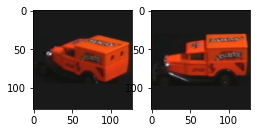

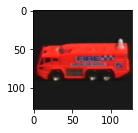

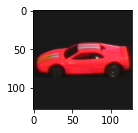

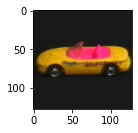

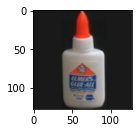

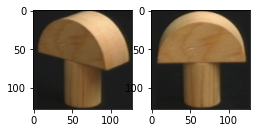

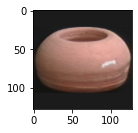

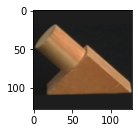

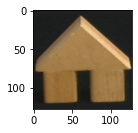

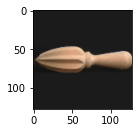

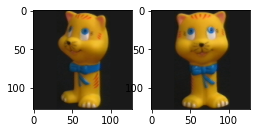

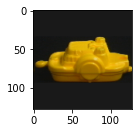

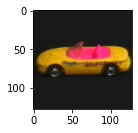

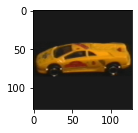

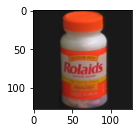

In [88]:
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)